In [2]:
import pandas as pd
import json 
import os
import imp
from IPython.display import Image
# pip install --user python-twitter


http://twitter.com/apps/new

In [ ]:
Image("pngs/apptwitter_new.png")

In [ ]:
Image("pngs/login_to_twitter.png")

In [ ]:
Image("pngs/create_app.png")

In [ ]:
Image("pngs/select_app.png")

In [ ]:
Image("pngs/app_created.png")

In [ ]:
Image("pngs/create_tokens_pass.png")

In [ ]:
Image("pngs/tokens_created.png")

In [ ]:
Image("pngs/token_pass_final.png")

Setting input and output directories

In [2]:
input_dir='/home/mab/github_repos/TwitterMining'

output_dir='/home/mab/Desktop/twitTemp'

# cred_dic=None

cred_dic='/home/mab/github_repos/TwitterMining/credentials/auth_cred.txt'
# cred_dic='/media/sergios-len/Elements/Brighton_workshop/auth_cred.txt'

# working_dir='/home/sergios-len/Documents/githubs/TwitterMining'
pp= !pwd
os.chdir(input_dir)
from test_class_tpa import create_df
import collect_tweets_notebook as ctn

os.chdir(pp[0])

def create_beaker_com_dict(sps):
    nsps={}
    for k,v in sps.items():
        nsps[k]=[]
        if k=='date_split':
            for kk in sorted(v.keys()):
                nsps[k].append(v[kk].strftime('%Y%m%d'))
        else:
            for kk in sorted(v.keys()):
                nsps[k].append(v[kk])

    return nsps


I am being imported from another module


Authentication and login in twitter api

In [ ]:
vv=ctn.UserAuth(auth_file=cred_dic)

In [ ]:
vv.login()

In [ ]:
vv.check_login()

In [ ]:
twi_api=vv.get_auth()

Search

The twitter search api page:
https://dev.twitter.com/rest/public/search

In [ ]:
search_term='#France -Paris'

In [ ]:
sea=ctn.TwitterSearch(twi_api,search_text=search_term,working_path=output_dir,out_file_dir=None,
max_pages=10,results_per_page=100,sin_id=None,max_id=None,verbose=True)

In [ ]:
sea.streamsearch()

Creating the twitter dataframe

In [3]:
json_dir='/home/mab/Desktop/twitTemp/Output'
selt='rr'
# outname='/home/sergios-len/Documents/W5/myScripts/beakers/%s_outpd.csv' %fifi
outname=''
pdf,httoadds=create_df(json_dir,selt,outname,multihas=False,r_or_p='python')
columnss=['id','user_id','username','created_at','language','hashtag_count',
          'retweet_count','mention_count','statuses_count','followers_count',
          'friends_count','listed_count',
          'videos_count','photos_count','undef_count',
          'coordinates','bounding','place','hashtags','mentions','text']
pdf=pdf[columnss]

['#France_Paris.json', '#France.json', '#France_-Paris.json']
581
2541
386
Index([u'#Photos', u'#Undefined', u'#Videos', u'Mentions', u'bounding',
       u'coordinates', u'created_at', u'followers_count', u'friends_count',
       u'hashtag_count', u'hashtags', u'id', u'lang', u'listed_count',
       u'mention_count', u'place', u'retweet_count', u'statuses_count',
       u'text', u'user_id', u'username'],
      dtype='object')


In [7]:
pdf.head()

,id,user_id,username,lang,created_at,hashtag_count,mention_count,followers_count,friends_count,listed_count,...,statuses_count,#Undefined,#Videos,#Photos,coordinates,bounding,place,hashtags,Mentions,text
0,736179397611429888,22692199,HISTORY,en,Fri May 27 12:57:00 +0000 2016,2,0,1524223,17069.0,9643.0,...,46613,0,0,0,"""""",None,None,"[thisdayinhistory, france]",[],"On #ThisDayInHistory 1941, the British navy si..."
1,736299538303057920,64643056,RT_com,en,Fri May 27 20:54:24 +0000 2016,1,0,2126025,565.0,17993.0,...,168440,0,0,0,"""""",None,None,[france],[],No weekend work emails if new law forbidding t...
2,736292031203512320,64643056,RT_com,en,Fri May 27 20:24:34 +0000 2016,3,0,2126025,565.0,17993.0,...,168440,0,0,0,"""""",None,None,"[loitravail, france, labor]",[],"Chaos, uncertainty &amp; anger: 5 ways anti-#l..."
3,736628844870897664,718166731835969536,gaiadifelice,en,Sat May 28 18:42:57 +0000 2016,3,2,7,26.0,1.0,...,294,1,0,1,"""""",None,None,"[ilvolo, parigi, france]","[(1391842856, ErcoleGinoble), (582304828, Ilvo...",RT @Ilvolomundial: Shared by @ErcoleGinoble #P...
4,736628805335420928,2416469280,BxBabnayMe,en,Sat May 28 18:42:47 +0000 2016,5,3,31,226.0,33.0,...,743,1,0,1,"""""",None,None,"[luxury, travel, lovetravel, cannes, france]","[(22411342, MrScottEddy), (1465448120, Azamara...",RT @MrScottEddy: Here's the sunset in #Cannes ...


Accessing the data of a tweet from its id

In [12]:
ppd=pdf[pdf['id']=='736628805335420928']
tx=ppd.text.tolist()[0]
screen_name=ppd.username.tolist()[0]
idt=ppd.id.tolist()[0]
print tx
# print ppd.retweet_count.tolist()

RT @MrScottEddy: Here's the sunset in #Cannes #France, aboard the @AzamaraQuest on @AzamaraVoyages. #LoveTravel #Luxury #Travel https://t.c…
[10.0]


In [10]:
link=' https://twitter.com/%s/status/%s ' %(screen_name,idt)

In [11]:
link

u' https://twitter.com/BxBabnayMe/status/736628805335420928 '

# SCRAPING

https://twitter.com/search-home

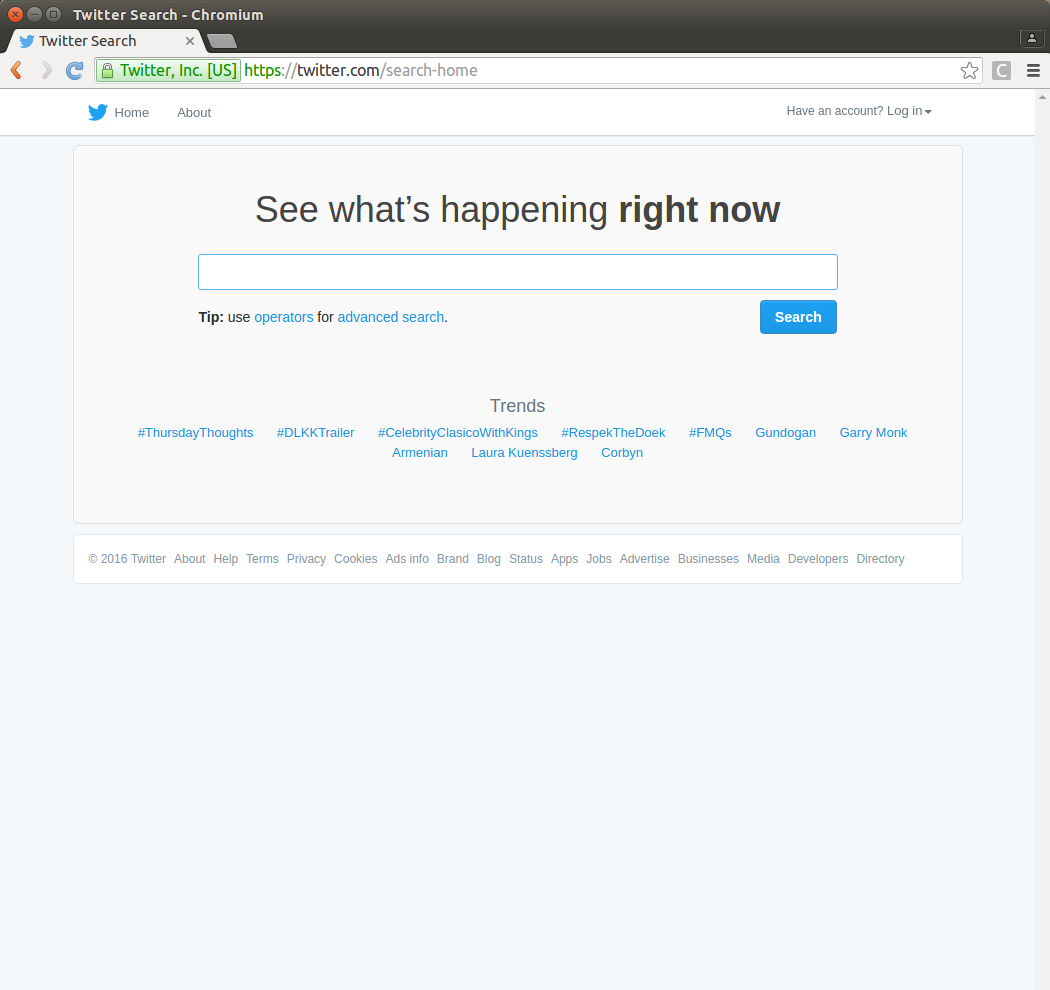

In [3]:
Image("pngs/twitter_search.png")

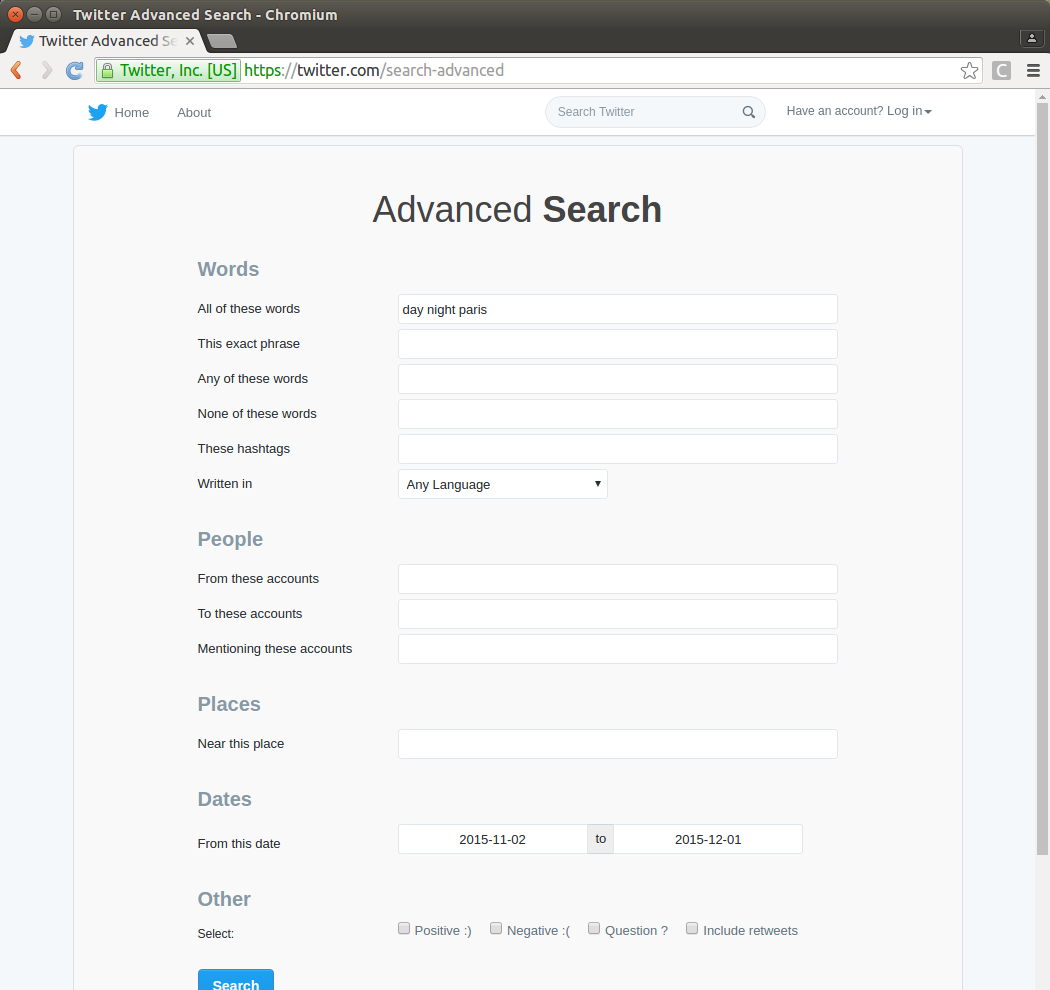

In [5]:
Image("pngs/twitter_adv_search.png")

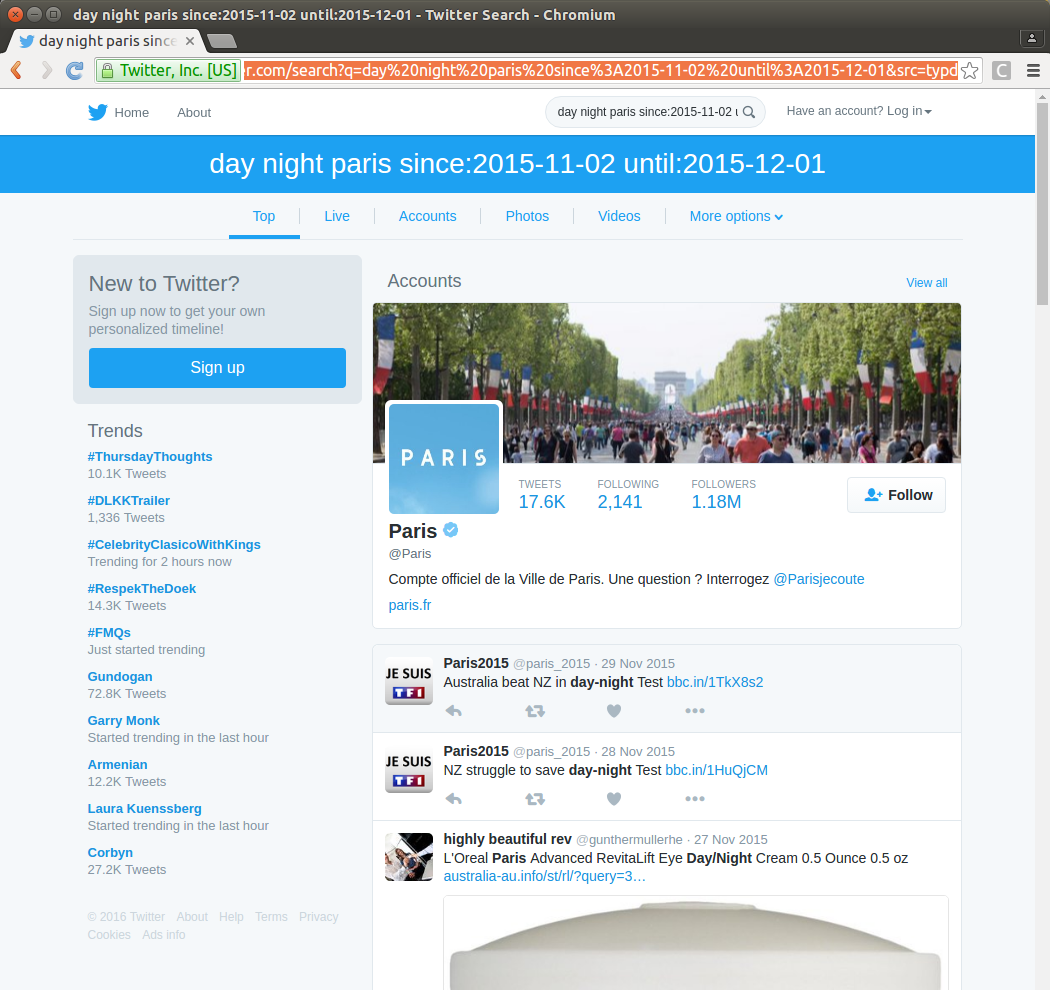

In [6]:
Image("pngs/twitter_search_result.png")